In [1]:
%matplotlib notebook

import json
import os
import glob
import pandas as pd

logs_path = '../logs'

In [2]:
def load_data(exp_id):
    meta_path = os.path.join(logs_path, exp_id, 'metadata.json')
    ranks_paths = glob.iglob(os.path.join(logs_path, exp_id, 'rank_*.log'))
    data = {}
    with open(meta_path) as f:
        data['meta'] = json.load(f)
    for p in ranks_paths:
        with open(p) as f:
            basename = os.path.basename(p)
            logs = [json.loads(line) for line in f]
            data[basename] = logs
    return data


def make_valacc_df(exp_id):
    data = load_data(exp_id)
    valaccs = (dict(rank=key.strip('.log'), **log) for key in data if 'rank_' in key
                   for log in data[key] if 'ValAcc' in log)
    df = pd.DataFrame(valaccs)
    df['ValAcc'] = df['ValAcc'].str.strip('%').astype(float)
    return df
    

<IPython.core.display.Javascript object>


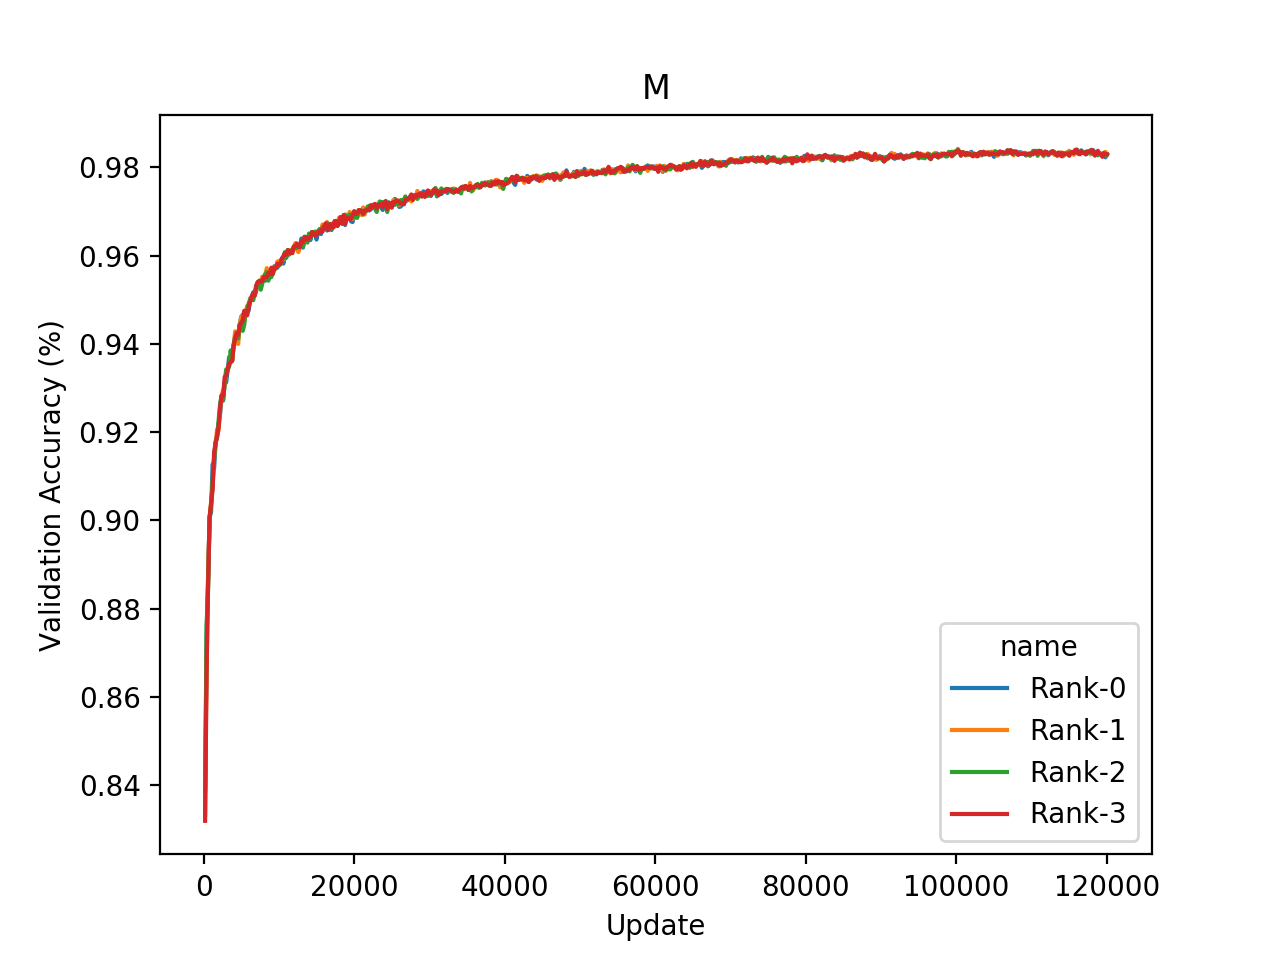

Text(0.5,1,'M')

In [3]:
df = make_valacc_df('mnist_paar_agg32_4')
ax = df.pivot(index='Update', columns='name', values='ValAcc').plot()
ax.set_ylabel('Validation Accuracy (%)')
ax.set_title('M')

In [4]:
df

,Epoch,Rank,Update,ValAcc,hostname,level,msg,name,pid,rank,time,v
0,1,0,200,0.838750,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:45:23Z,0
1,1,0,400,0.873636,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:45:28Z,0
2,2,0,600,0.886932,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:45:32Z,0
3,2,0,800,0.900682,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:45:37Z,0
4,3,0,1000,0.901932,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:45:42Z,0
5,3,0,1200,0.912727,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:45:47Z,0
6,4,0,1400,0.911818,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:45:52Z,0
7,4,0,1600,0.917614,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:45:56Z,0
8,5,0,1800,0.919205,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:46:01Z,0
9,5,0,2000,0.921932,instance-1,30,,Rank-0,19075,rank_0,2018-02-06T04:46:06Z,0
